In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [3]:
no_points = 500
centres = [[-.5, .5], [.5, -.5]]
x, y = datasets.make_circles(n_samples = no_points, random_state = 123, noise = .1, factor = .2)
#device = torch.device("cuda")
x_data = torch.Tensor(x)#.to('cuda')
y_data = torch.Tensor(y.reshape(500, 1))#.to('cuda')

def scatter_plot():
    plt.scatter(x[y==0, 0], x[y==0, 1])
    plt.scatter(x[y==1, 0], x[y==1, 1])

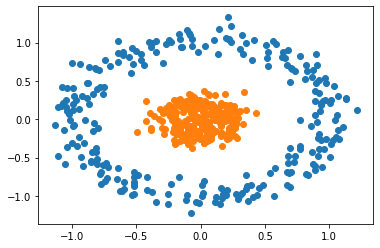

In [24]:
scatter_plot()

In [4]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_1, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, hidden_1)
        self.linear2 = nn.Linear(hidden_1, output_size)
    def forward(self, x):
        x = torch.sigmoid(self.linear(x))
        x = torch.sigmoid(self.linear2(x))
        return x
    def predict(self, x):
        pred = self.forward(x)
        if pred >= .5:
            return 1
        else:
            return 0

In [5]:
torch.manual_seed(2)
model = Model(2, 4, 1) # 4 hidden layers - 4 linear graphs to form circle
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [6]:
criterion = nn.BCELoss()
optimiser = torch.optim.Adam(model.parameters(), lr = .1)

In [8]:
epochs = 500
losses = []

for i in range(epochs):
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    print("epoch: ", i, " loss: ", loss.item())
    losses.append(loss.item())
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

epoch:0 loss:0.7148522138595581
epoch:1 loss:0.6947320699691772
epoch:2 loss:0.6955163478851318
epoch:3 loss:0.7014891505241394
epoch:4 loss:0.7013985514640808
epoch:5 loss:0.6974702477455139
epoch:6 loss:0.6939254403114319
epoch:7 loss:0.6928594708442688
epoch:8 loss:0.6939385533332825
epoch:9 loss:0.6954389810562134
epoch:10 loss:0.6958749294281006
epoch:11 loss:0.6949177384376526
epoch:12 loss:0.6931487321853638
epoch:13 loss:0.6913900375366211
epoch:14 loss:0.6901611089706421
epoch:15 loss:0.6894587874412537
epoch:16 loss:0.6888436079025269
epoch:17 loss:0.6877667903900146
epoch:18 loss:0.685900866985321
epoch:19 loss:0.6832477450370789
epoch:20 loss:0.6800417304039001
epoch:21 loss:0.6765584945678711
epoch:22 loss:0.6729682087898254
epoch:23 loss:0.6692693829536438
epoch:24 loss:0.6653285026550293
epoch:25 loss:0.6609663963317871
epoch:26 loss:0.6560587882995605
epoch:27 loss:0.6505836248397827
epoch:28 loss:0.6446025371551514
epoch:29 loss:0.6381978392601013
epoch:30 loss:0.63140

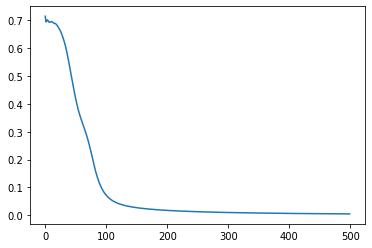

In [9]:
plt.plot(range(epochs), losses)

In [11]:
def plot_decision_boundry(x, y): # define grid that spans data of data points graph

    x_span = np.linspace(min(x[:, 0]), max(x[:, 0])) # min and max horiz coord value. index every row in array x, b/w min/max val of array x and 0 i.e. min/max horiz val in 1st col. n.b. all horiz (x) vals in first col of array - y in second

    y_span = np.linspace(min(x[:, 1]), max(x[:, 1])) # each spans entire range of data in relevant axis
    
    xx, yy = np.meshgrid(x_span, y_span) # turns vectors into matrix - new rows/cols are copies of original row/col. new matricies spans entire vert and horiz range of graph data - can make cartesian grid that covers data set
    
    grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()]) #2d -> 1d i.e. flatten; 50 y coords per x - defines grid

    pred_func = model.forward(grid)
    z = pred_func.view(xx.shape).detach().numpy()
    plt.contourf(xx, yy, z)

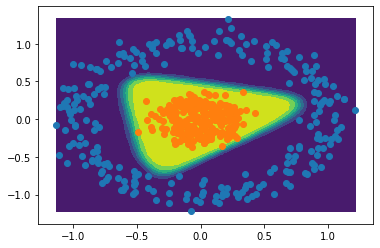

In [12]:
plot_decision_boundry(x, y) # gives equally spaced points
scatter_plot()

prediction is1


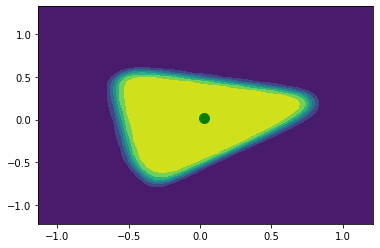

In [17]:
test_x = .025
test_y = .025
point = torch.Tensor([test_x, test_y])
prediction = model.predict(point)
plt.plot([test_x], [test_y], marker='o', markersize=10, color="green")
print("prediction is " , prediction)
plot_decision_boundry(x, y)